## E1: Effects on Time Anova

In [1]:
import pandas as pd
import numpy as np
from pyvttbl import DataFrame
from pyvttbl.stats import Anova
import os

##### SET STUDY VARIABLES
## Between-factors >> group on....
# Dep: Exptertise, FATR: Study
human = False
human = True

FATR = True
FATR = False



if FATR:
    print("** FATR Study **")
    source = os.path.join("data","fatr_students.csv")
    bfactor = "Study"
else:
    print("** Depend Study **")
    source = os.path.join("data","depend_only.csv")
    bfactor = "Expertise"


temp_csv_path = 'temp_cleaned_data.csv'

## Set DVs >> process multiple in one script, or just one at a time; 
dv_cols = ['NasaTLX','Decision','Diagnosis Time','Cooper Harper']
dv_cols = ['Cooper Harper']  
dv_cols = ['NasaTLX']
dv_cols = ['Decision']
dv_cols = ['Diagnosis Time']  

# Create a pyvttbl.DataFrame from the cleaned pandas DataFrame
df = DataFrame()
df_pandas = pd.read_csv(source)

# Calculate NasaTLX if this is the DV for analysis
if dv_cols[0] != "NasaTLX":
    ## Drop rows with missing values in relevant columns
    # CAUTION! If dv_cols list contains multiple columns, then columns missing row values will obliterate other columns' row values
    df_pandas = df_pandas.dropna(subset=dv_cols)
    temp_csv_path = 'temp_cleaned_data.csv'
    df_pandas.to_csv(temp_csv_path, index=False)
else:
    print("create NasaTLX composit measure...")
    # Invert 'Performance' scores
    df_pandas['Performance'] = 11 - df_pandas['Performance']
    columns = ['Performance', 'Temporal Demand', 'Frustration Level', 'Mental Demand', 'Effort']
    for column in columns:
        median = df_pandas[column].median()
        df_pandas[column].fillna(median)
    # Calculate the NasaTLX composite score
    df_pandas['NasaTLX'] = df_pandas[columns].mean(axis=1)
    df_pandas.to_csv(temp_csv_path, index=False)

df.read_tbl(temp_csv_path)


    
for dv in dv_cols:
    print(f"Running ANOVA for: {dv}")
    
    aov = Anova()
    aov.run(df, dv, wfactors=['Scenario', 'Fault'], bfactors=[bfactor])   
    aov.truncate(test='gg')

    if human:
        ### HUMAN READABLE
        print(aov)
        print("\n\n") # this puts spaces between reports when running multiples
    else:
        ### For the Robots
        print(dict(aov))
        print("\n\n") 
    
        marginal_means = aov.get_marginal_means(['Scenario', 'Fault', bfactor])
        print(f"Marginal Means for: {dv}")
        print(marginal_means)
        print("\n\n") 



** Depend Study **
Running ANOVA for: Diagnosis Time
('Scenario', 'Fault')
('Expertise',)
('Fault', 'Expertise')
('Scenario', 'Fault', 'Expertise')
Diagnosis Time ~ Scenario * Fault * Expertise

TESTS OF BETWEEN-SUBJECTS EFFECTS

Measure: Diagnosis Time - No Significant Effects or Interactions


TESTS OF WITHIN SUBJECTS EFFECTS

Measure: Diagnosis Time
       Source                                Type III    eps   df       MS         F        Sig.      et2_G   Obs.     SE     95% CI   lambda   Obs.  
                                                SS                                                                                              Power 
Scenario               Greenhouse-Geisser   283402.667     1    1   283402.667   20.369   1.722e-04   0.208     48   18.015   35.309   44.441       1 
-----------------------------------------------------------------------------------------------------------------------------------------------------
Scenario * Expertise   Greenhouse-Geisser 

In [3]:
import pandas as pd
import numpy as np
from pyvttbl import DataFrame
from pyvttbl.stats import Anova
import os

##### SET STUDY VARIABLES
## Between-factors >> group on....
# Dep: Exptertise, FATR: Study
human = False
human = True

FATR = True
FATR = False



if FATR:
    print("** FATR Study **")
    source = os.path.join("data","fatr_students.csv")
    bfactor = "Study"
else:
    print("** Depend Study **")
    source = os.path.join("data","depend_only.csv")
    bfactor = "Expertise"


temp_csv_path = 'temp_cleaned_data.csv'

## Set DVs >> process multiple in one script, or just one at a time; 
dv_cols = ['NasaTLX','Decision','Diagnosis Time','Cooper Harper']
dv_cols = ['Cooper Harper']  
dv_cols = ['Decision']
dv_cols = ['Diagnosis Time']  
dv_cols = ['NasaTLX']

# Create a pyvttbl.DataFrame from the cleaned pandas DataFrame
df = DataFrame()
df_pandas = pd.read_csv(source)

# Calculate NasaTLX if this is the DV for analysis
if dv_cols[0] != "NasaTLX":
    ## Drop rows with missing values in relevant columns
    # CAUTION! If dv_cols list contains multiple columns, then columns missing row values will obliterate other columns' row values
    df_pandas = df_pandas.dropna(subset=dv_cols)
    temp_csv_path = 'temp_cleaned_data.csv'
    df_pandas.to_csv(temp_csv_path, index=False)
else:
    print("create NasaTLX composit measure...")
    # Invert 'Performance' scores
    df_pandas['Performance'] = 11 - df_pandas['Performance']
    columns = ['Performance', 'Temporal Demand', 'Frustration Level', 'Mental Demand', 'Effort']
    for column in columns:
        median = df_pandas[column].median()
        df_pandas[column].fillna(median)
    # Calculate the NasaTLX composite score
    df_pandas['NasaTLX'] = df_pandas[columns].mean(axis=1)
    df_pandas.to_csv(temp_csv_path, index=False)

df.read_tbl(temp_csv_path)


    
for dv in dv_cols:
    print(f"Running ANOVA for: {dv}")
    
    aov = Anova()
    aov.run(df, dv, wfactors=['Scenario', 'Fault'], bfactors=[bfactor])   
    aov.truncate(test='gg')

    if human:
        ### HUMAN READABLE
        print(aov)
        print("\n\n") # this puts spaces between reports when running multiples
    else:
        ### For the Robots
        print(dict(aov))
        print("\n\n") 
    
        marginal_means = aov.get_marginal_means(['Scenario', 'Fault', bfactor])
        print(f"Marginal Means for: {dv}")
        print(marginal_means)
        print("\n\n") 



** Depend Study **
create NasaTLX composit measure...
Running ANOVA for: NasaTLX
('Scenario',)
('Fault',)
('Scenario', 'Fault')
('Scenario', 'Expertise')
('Fault', 'Expertise')
('Scenario', 'Fault', 'Expertise')
NasaTLX ~ Scenario * Fault * Expertise

TESTS OF BETWEEN-SUBJECTS EFFECTS

Measure: NasaTLX
     Source        Type III   df     MS        F        Sig.      et2_G   Obs.    SE     95% CI   lambda   Obs.  
                      SS                                                                                   Power 
Between Subjects    352.001   23                                                                                 
Expertise           177.534    1   177.534   22.387   1.011e-04   0.392     12   0.860    1.686   12.211   0.916 
Error               174.467   22     7.930                                                                       

TESTS OF WITHIN SUBJECTS EFFECTS

Measure: NasaTLX - No Significant Effects or Interactions

TABLES OF ESTIMATED MARGINAL MEA

In [4]:
import pandas as pd
import numpy as np
from pyvttbl import DataFrame
from pyvttbl.stats import Anova
import os

##### SET STUDY VARIABLES
## Between-factors >> group on....
# Dep: Exptertise, FATR: Study
human = False
human = True

FATR = True
FATR = False



if FATR:
    print("** FATR Study **")
    source = os.path.join("data","fatr_students.csv")
    bfactor = "Study"
else:
    print("** Depend Study **")
    source = os.path.join("data","depend_only.csv")
    bfactor = "Expertise"


temp_csv_path = 'temp_cleaned_data.csv'

## Set DVs >> process multiple in one script, or just one at a time; 
dv_cols = ['NasaTLX','Decision','Diagnosis Time','Cooper Harper']
dv_cols = ['Decision']
dv_cols = ['Diagnosis Time']  
dv_cols = ['NasaTLX']
dv_cols = ['Cooper Harper']  

# Create a pyvttbl.DataFrame from the cleaned pandas DataFrame
df = DataFrame()
df_pandas = pd.read_csv(source)

# Calculate NasaTLX if this is the DV for analysis
if dv_cols[0] != "NasaTLX":
    ## Drop rows with missing values in relevant columns
    # CAUTION! If dv_cols list contains multiple columns, then columns missing row values will obliterate other columns' row values
    df_pandas = df_pandas.dropna(subset=dv_cols)
    temp_csv_path = 'temp_cleaned_data.csv'
    df_pandas.to_csv(temp_csv_path, index=False)
else:
    print("create NasaTLX composit measure...")
    # Invert 'Performance' scores
    df_pandas['Performance'] = 11 - df_pandas['Performance']
    columns = ['Performance', 'Temporal Demand', 'Frustration Level', 'Mental Demand', 'Effort']
    for column in columns:
        median = df_pandas[column].median()
        df_pandas[column].fillna(median)
    # Calculate the NasaTLX composite score
    df_pandas['NasaTLX'] = df_pandas[columns].mean(axis=1)
    df_pandas.to_csv(temp_csv_path, index=False)

df.read_tbl(temp_csv_path)


    
for dv in dv_cols:
    print(f"Running ANOVA for: {dv}")
    
    aov = Anova()
    aov.run(df, dv, wfactors=['Scenario', 'Fault'], bfactors=[bfactor])   
    aov.truncate(test='gg')

    if human:
        ### HUMAN READABLE
        print(aov)
        print("\n\n") # this puts spaces between reports when running multiples
    else:
        ### For the Robots
        print(dict(aov))
        print("\n\n") 
    
        marginal_means = aov.get_marginal_means(['Scenario', 'Fault', bfactor])
        print(f"Marginal Means for: {dv}")
        print(marginal_means)
        print("\n\n") 



** Depend Study **
Running ANOVA for: Cooper Harper
('Scenario',)
('Fault',)
('Scenario', 'Fault')
('Scenario', 'Expertise')
('Fault', 'Expertise')
('Scenario', 'Fault', 'Expertise')
Cooper Harper ~ Scenario * Fault * Expertise

TESTS OF BETWEEN-SUBJECTS EFFECTS

Measure: Cooper Harper
     Source        Type III   df     MS       F     Sig.    et2_G    Obs.     SE     95% CI   lambda   Obs.  
                      SS                                                                               Power 
Between Subjects    211.616   22                                                                             
Expertise            54.607    1   54.607   7.304   0.013      --   11.500   0.856    1.677    4.000   0.479 
Error               157.009   21    7.477                                                                    

TESTS OF WITHIN SUBJECTS EFFECTS

Measure: Cooper Harper - No Significant Effects or Interactions

TABLES OF ESTIMATED MARGINAL MEANS

Estimated Marginal Means fo

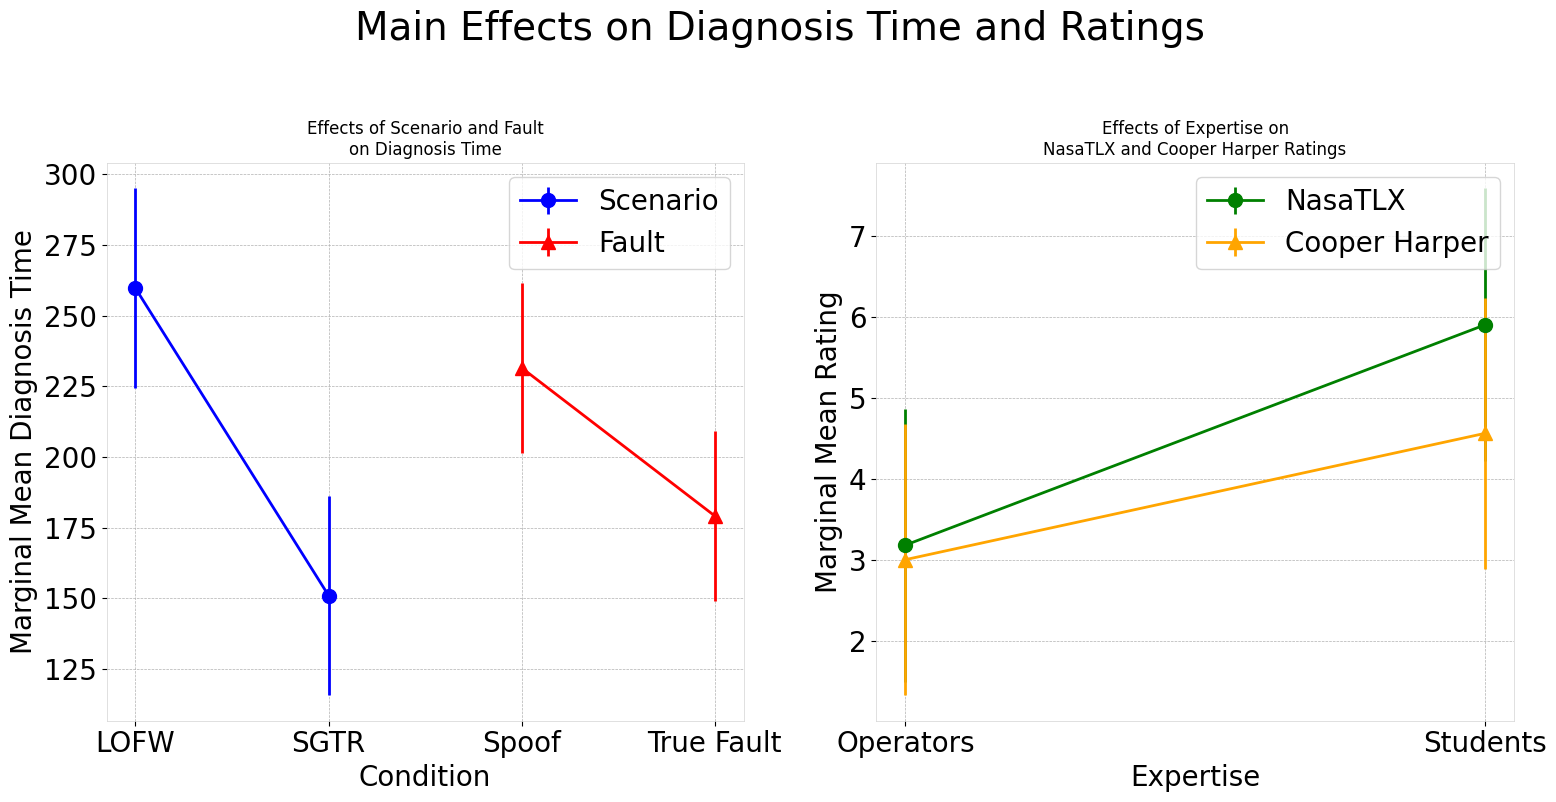

In [5]:
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec

# Title and filename setup
title = 'Main Effects on Diagnosis Time and Ratings'
filename = title.replace(' ', '_') + '.png'

# Data for Scenario and Fault
scenario_conditions = ['LOFW', 'SGTR']
scenario_means = [259.65, 150.98]
scenario_errors = [35.309 , 35.309 ]

fault_conditions = ['Spoof', 'True Fault']
fault_means = [231.50, 179.13]
fault_errors = [30.010, 30.010]

# Data for NasaTLX and Cooper Harper
expertise_conditions = ['Operators', 'Students']
nasatlx_means = [3.18, 5.90]
nasatlx_errors = [1.686 , 1.686 ]

cooperharper_means = [3.00, 4.56]
cooperharper_errors = [1.677, 1.677]

# Double the size of all text elements
plt.rcParams.update({'font.size': plt.rcParams['font.size'] * 2})

# Set the figure size and GridSpec layout
fig = plt.figure(figsize=(16, 8))
gs = gridspec.GridSpec(1, 2, width_ratios=[1, 1])  # Equal width for both subplots

# Create subplots using the GridSpec layout
axs = [plt.subplot(gs[0]), plt.subplot(gs[1])]

# ---- Left Plot: Scenario and Fault vs Diagnosis Time ----
axs[0].errorbar(scenario_conditions, scenario_means, yerr=scenario_errors, fmt='-o', color='blue', linewidth=2, markersize=10, label='Scenario')
axs[0].errorbar(fault_conditions, fault_means, yerr=fault_errors, fmt='-^', color='red', linewidth=2, markersize=10, label='Fault')
axs[0].set_title('Effects of Scenario and Fault\non Diagnosis Time', fontsize=12)
axs[0].set_ylabel('Marginal Mean Diagnosis Time')
axs[0].set_xlabel('Condition')
axs[0].grid(True, which='both', linestyle='--', linewidth=0.5)
axs[0].legend()

# Adjusting axes for Scenario and Fault plot
for spine in ['top', 'right', 'left', 'bottom']:
    axs[0].spines[spine].set_color('lightgray')
    axs[0].spines[spine].set_linewidth(0.5)

# ---- Right Plot: NasaTLX and Cooper Harper vs Expertise ----
axs[1].errorbar(expertise_conditions, nasatlx_means, yerr=nasatlx_errors, fmt='-o', color='green', linewidth=2, markersize=10, label='NasaTLX')
axs[1].errorbar(expertise_conditions, cooperharper_means, yerr=cooperharper_errors, fmt='-^', color='orange', linewidth=2, markersize=10, label='Cooper Harper')
axs[1].set_title('Effects of Expertise on\nNasaTLX and Cooper Harper Ratings', fontsize=12)
axs[1].set_ylabel('Marginal Mean Rating')
axs[1].set_xlabel('Expertise')
axs[1].set_xticks([0, 1])
axs[1].set_xticklabels(expertise_conditions)
axs[1].grid(True, which='both', linestyle='--', linewidth=0.5)
axs[1].legend()

# Adjusting axes for NasaTLX and Cooper Harper plot
for spine in ['top', 'right', 'left', 'bottom']:
    axs[1].spines[spine].set_color('lightgray')
    axs[1].spines[spine].set_linewidth(0.5)

# Adding a super title for the entire figure
plt.suptitle(title, fontsize=28, y=1.015)

plt.tight_layout()
plt.savefig(filename, format='png', dpi=300, bbox_inches='tight')
plt.show()

# Reset plt.rcParams to default if needed for other plots in the notebook
plt.rcParams.update(plt.rcParamsDefault)

Main_Effects_on_Diagnosis_Time_and_Ratings.png


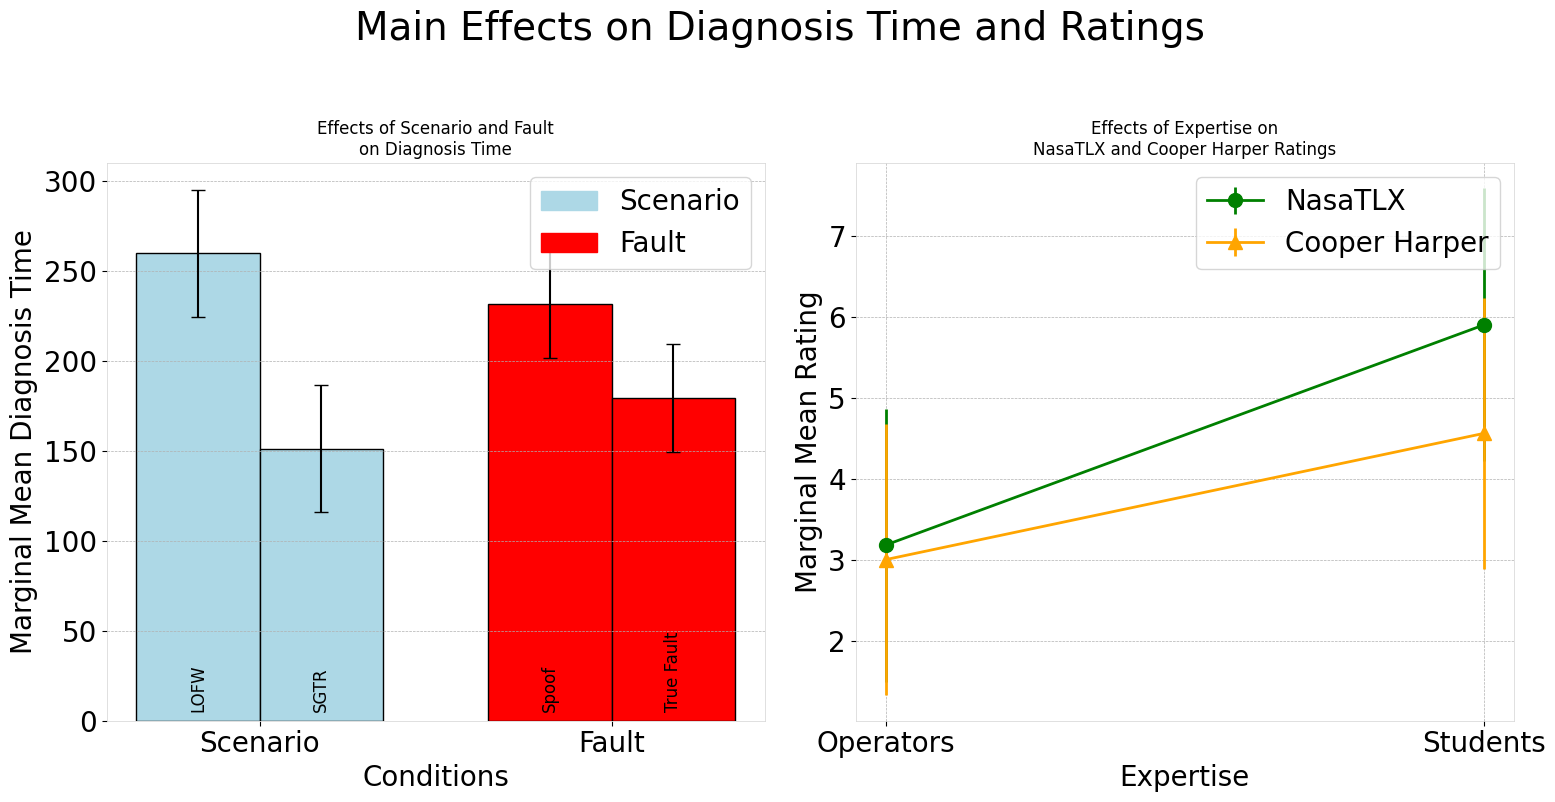

In [8]:
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import numpy as np

# Title and filename setup
title = 'Main Effects on Diagnosis Time and Ratings'
filename = title.replace(' ', '_') + '.png'

# Data for Scenario and Fault
scenario_conditions = ['LOFW', 'SGTR']
scenario_means = [259.65, 150.98]
scenario_errors = [35.309, 35.309]

fault_conditions = ['Spoof', 'True Fault']
fault_means = [231.50, 179.13]
fault_errors = [30.010, 30.010]

# Data for NasaTLX and Cooper Harper
expertise_conditions = ['Operators', 'Students']
nasatlx_means = [3.18, 5.90]
nasatlx_errors = [1.686, 1.686]

cooperharper_means = [3.00, 4.56]
cooperharper_errors = [1.677, 1.677]

# Double the size of all text elements
plt.rcParams.update({'font.size': plt.rcParams['font.size'] * 2})

# Set the figure size and GridSpec layout
fig = plt.figure(figsize=(16, 8))
gs = gridspec.GridSpec(1, 2, width_ratios=[1, 1])  # Equal width for both subplots

# Create subplots using the GridSpec layout
axs = [plt.subplot(gs[0]), plt.subplot(gs[1])]

# ---- Left Plot: Scenario and Fault vs Diagnosis Time (Vertical Bars) ----
conditions = ['Scenario', 'Fault']
levels = [['LOFW', 'SGTR'], ['Spoof', 'True Fault']]
means = [scenario_means, fault_means]
errors = [scenario_errors, fault_errors]
colors = ['lightblue', 'red']

# Set the width of the bars
bar_width = 0.35

# Set the positions of the bars on the x-axis
r = np.arange(len(conditions))
r1 = r - bar_width/2
r2 = r + bar_width/2

# Set the margin for the level labels
label_margin = 5

for i in range(len(conditions)):
    axs[0].bar(r1[i], means[i][0], width=bar_width, yerr=errors[i][0], capsize=5, color=colors[i], edgecolor='black', linewidth=1)
    axs[0].bar(r2[i], means[i][1], width=bar_width, yerr=errors[i][1], capsize=5, color=colors[i], edgecolor='black', linewidth=1)
    for j in range(len(levels[i])):
        axs[0].text(r[i] + bar_width*(j-0.5), label_margin, levels[i][j], rotation=90, ha='center', va='bottom', fontsize=12)

# Adding a legend for the left plot
legend_labels = ['Scenario', 'Fault']
legend_handles = [plt.Rectangle((0, 0), 1, 1, color=colors[i]) for i in range(len(colors))]
axs[0].legend(legend_handles, legend_labels, loc='upper right')

axs[0].set_title('Effects of Scenario and Fault\non Diagnosis Time', fontsize=12)
axs[0].set_ylabel('Marginal Mean Diagnosis Time')
axs[0].set_xlabel('Conditions')
axs[0].set_xticks(r)
axs[0].set_xticklabels(conditions)
axs[0].grid(True, which='both', axis='y', linestyle='--', linewidth=0.5)

# Adjusting axes for Scenario and Fault plot
for spine in ['top', 'right', 'left', 'bottom']:
    axs[0].spines[spine].set_color('lightgray')
    axs[0].spines[spine].set_linewidth(0.5)

# ---- Right Plot: NasaTLX and Cooper Harper vs Expertise (Unchanged) ----
axs[1].errorbar(expertise_conditions, nasatlx_means, yerr=nasatlx_errors, fmt='-o', color='green', linewidth=2, markersize=10, label='NasaTLX')
axs[1].errorbar(expertise_conditions, cooperharper_means, yerr=cooperharper_errors, fmt='-^', color='orange', linewidth=2, markersize=10, label='Cooper Harper')
axs[1].set_title('Effects of Expertise on\nNasaTLX and Cooper Harper Ratings', fontsize=12)
axs[1].set_ylabel('Marginal Mean Rating')
axs[1].set_xlabel('Expertise')
axs[1].set_xticks([0, 1])
axs[1].set_xticklabels(expertise_conditions)
axs[1].grid(True, which='both', linestyle='--', linewidth=0.5)
axs[1].legend()

# Adjusting axes for NasaTLX and Cooper Harper plot
for spine in ['top', 'right', 'left', 'bottom']:
    axs[1].spines[spine].set_color('lightgray')
    axs[1].spines[spine].set_linewidth(0.5)

# Adding a super title for the entire figure
plt.suptitle(title, fontsize=28, y=1.015)

plt.tight_layout()
plt.savefig(filename, format='png', dpi=300, bbox_inches='tight')
print(filename)
plt.show()

# Reset plt.rcParams to default if needed for other plots in the notebook
plt.rcParams.update(plt.rcParamsDefault)

Main_Effects_on_Diagnosis_Time_and_Ratings.png


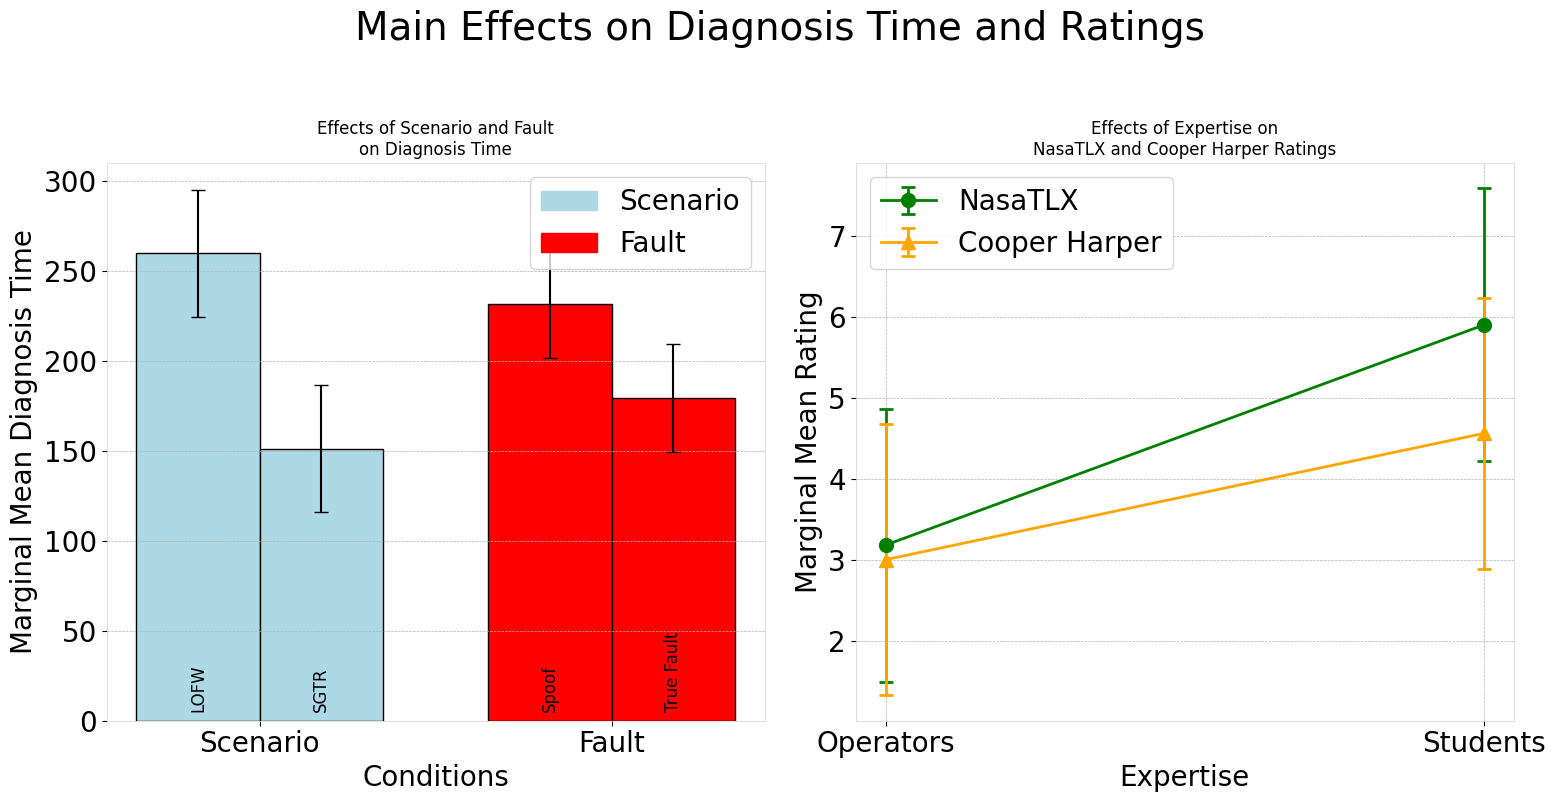

In [9]:
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import numpy as np

# Title and filename setup
title = 'Main Effects on Diagnosis Time and Ratings'
filename = title.replace(' ', '_') + '.png'

# Data for Scenario and Fault
scenario_conditions = ['LOFW', 'SGTR']
scenario_means = [259.65, 150.98]
scenario_errors = [35.309, 35.309]

fault_conditions = ['Spoof', 'True Fault']
fault_means = [231.50, 179.13]
fault_errors = [30.010, 30.010]

# Data for NasaTLX and Cooper Harper
expertise_conditions = ['Operators', 'Students']
nasatlx_means = [3.18, 5.90]
nasatlx_errors = [1.686, 1.686]

cooperharper_means = [3.00, 4.56]
cooperharper_errors = [1.677, 1.677]

# Double the size of all text elements
plt.rcParams.update({'font.size': plt.rcParams['font.size'] * 2})

# Set the figure size and GridSpec layout
fig = plt.figure(figsize=(16, 8))
gs = gridspec.GridSpec(1, 2, width_ratios=[1, 1])  # Equal width for both subplots

# Create subplots using the GridSpec layout
axs = [plt.subplot(gs[0]), plt.subplot(gs[1])]

# ---- Left Plot: Scenario and Fault vs Diagnosis Time (Vertical Bars) ----
conditions = ['Scenario', 'Fault']
levels = [['LOFW', 'SGTR'], ['Spoof', 'True Fault']]
means = [scenario_means, fault_means]
errors = [scenario_errors, fault_errors]
colors = ['lightblue', 'red']

# Set the width of the bars
bar_width = 0.35

# Set the positions of the bars on the x-axis
r = np.arange(len(conditions))
r1 = r - bar_width/2
r2 = r + bar_width/2

# Set the margin for the level labels
label_margin = 5

for i in range(len(conditions)):
    axs[0].bar(r1[i], means[i][0], width=bar_width, yerr=errors[i][0], capsize=5, color=colors[i], edgecolor='black', linewidth=1)
    axs[0].bar(r2[i], means[i][1], width=bar_width, yerr=errors[i][1], capsize=5, color=colors[i], edgecolor='black', linewidth=1)
    for j in range(len(levels[i])):
        axs[0].text(r[i] + bar_width*(j-0.5), label_margin, levels[i][j], rotation=90, ha='center', va='bottom', fontsize=12)

# Adding a legend for the left plot
legend_labels = ['Scenario', 'Fault']
legend_handles = [plt.Rectangle((0, 0), 1, 1, color=colors[i]) for i in range(len(colors))]
axs[0].legend(legend_handles, legend_labels, loc='upper right')

axs[0].set_title('Effects of Scenario and Fault\non Diagnosis Time', fontsize=12)
axs[0].set_ylabel('Marginal Mean Diagnosis Time')
axs[0].set_xlabel('Conditions')
axs[0].set_xticks(r)
axs[0].set_xticklabels(conditions)
axs[0].grid(True, which='both', axis='y', linestyle='--', linewidth=0.5)

# Adjusting axes for Scenario and Fault plot
for spine in ['top', 'right', 'left', 'bottom']:
    axs[0].spines[spine].set_color('lightgray')
    axs[0].spines[spine].set_linewidth(0.5)

# ---- Right Plot: NasaTLX and Cooper Harper vs Expertise (Unchanged) ----
axs[1].errorbar(expertise_conditions, nasatlx_means, yerr=nasatlx_errors, fmt='-o', color='green', linewidth=2, markersize=10, label='NasaTLX', capsize=5, capthick=2)
axs[1].errorbar(expertise_conditions, cooperharper_means, yerr=cooperharper_errors, fmt='-^', color='orange', linewidth=2, markersize=10, label='Cooper Harper', capsize=5, capthick=2)
axs[1].set_title('Effects of Expertise on\nNasaTLX and Cooper Harper Ratings', fontsize=12)
axs[1].set_ylabel('Marginal Mean Rating')
axs[1].set_xlabel('Expertise')
axs[1].set_xticks([0, 1])
axs[1].set_xticklabels(expertise_conditions)
axs[1].grid(True, which='both', linestyle='--', linewidth=0.5)
axs[1].legend()

# Adjusting axes for NasaTLX and Cooper Harper plot
for spine in ['top', 'right', 'left', 'bottom']:
    axs[1].spines[spine].set_color('lightgray')
    axs[1].spines[spine].set_linewidth(0.5)

# Adding a super title for the entire figure
plt.suptitle(title, fontsize=28, y=1.015)

plt.tight_layout()
plt.savefig(filename, format='png', dpi=300, bbox_inches='tight')
print(filename)
plt.show()

# Reset plt.rcParams to default if needed for other plots in the notebook
plt.rcParams.update(plt.rcParamsDefault)

In [16]:
## box plot data

import pandas as pd
import numpy as np
from pyvttbl import DataFrame
from pyvttbl.stats import Anova
import os

##### SET STUDY VARIABLES
## Between-factors >> group on....
# Dep: Exptertise, FATR: Study
human = False
human = True

FATR = True
FATR = False

word = 'Decision'

df=DataFrame()
df.read_tbl('data/depend_only.csv')
box = df.box_plot(word)
plt.show(box)



In [17]:
!ls

 anova_auto.ipynb	       image.png
 anova.ipynb		       Main_Effects_on_Decision_Accuracy.png
 anthropic.md.md	       Main_Effects_on_Diagnosis_Time_and_Ratings.png
 assistant.ipynb	       paper
'box(Decision).png'	       plot
 classify.py		       __pycache__
 claude_writes_results.ipynb   README.md
 data			       requirements.txt
 data_analysis.py	       src
 E1-Decision.ipynb	       study.ipynb
 E1-Time.ipynb		       temp_cleaned_data.csv
 fatr.ipynb		       venv


In [10]:
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import numpy as np

# Title and filename setup
title = 'Main Effects on Diagnosis Time and Ratings'
filename = title.replace(' ', '_') + '.png'

# Data for Scenario and Fault
scenario_conditions = ['LOFW', 'SGTR']
scenario_data = [[259.65, 150.98], [35.309, 35.309]]

fault_conditions = ['Spoof', 'True Fault']
fault_data = [[231.50, 179.13], [30.010, 30.010]]

# Data for NasaTLX and Cooper Harper
expertise_conditions = ['Operators', 'Students']
nasatlx_means = [3.18, 5.90]
nasatlx_errors = [1.686, 1.686]

cooperharper_means = [3.00, 4.56]
cooperharper_errors = [1.677, 1.677]

# Double the size of all text elements
plt.rcParams.update({'font.size': plt.rcParams['font.size'] * 2})

# Set the figure size and GridSpec layout
fig = plt.figure(figsize=(16, 8))
gs = gridspec.GridSpec(1, 2, width_ratios=[1, 1])  # Equal width for both subplots

# Create subplots using the GridSpec layout
axs = [plt.subplot(gs[0]), plt.subplot(gs[1])]

# ---- Left Plot: Scenario and Fault vs Diagnosis Time (Box Plots) ----
conditions = ['Scenario', 'Fault']
data = [scenario_data, fault_data]
colors = ['blue', 'red']

positions = np.arange(len(conditions))
box_width = 0.6

for i in range(len(conditions)):
    axs[0].boxplot(data[i], positions=[positions[i]], widths=[box_width], patch_artist=True, boxprops=dict(facecolor=colors[i], edgecolor='black', linewidth=1))

axs[0].set_title('Effects of Scenario and Fault\non Diagnosis Time', fontsize=12)
axs[0].set_ylabel('Marginal Mean Diagnosis Time')
axs[0].set_xlabel('Conditions')
axs[0].set_xticks(positions)
axs[0].set_xticklabels(conditions)
axs[0].grid(True, which='both', axis='y', linestyle='--', linewidth=0.5)

# Adjusting axes for Scenario and Fault plot
for spine in ['top', 'right', 'left', 'bottom']:
    axs[0].spines[spine].set_color('lightgray')
    axs[0].spines[spine].set_linewidth(0.5)

# ---- Right Plot: NasaTLX and Cooper Harper vs Expertise (with Error Bar Caps) ----
axs[1].errorbar(expertise_conditions, nasatlx_means, yerr=nasatlx_errors, fmt='-o', color='green', linewidth=2, markersize=10, label='NasaTLX', capsize=5, capthick=2)
axs[1].errorbar(expertise_conditions, cooperharper_means, yerr=cooperharper_errors, fmt='-^', color='orange', linewidth=2, markersize=10, label='Cooper Harper', capsize=5, capthick=2)
axs[1].set_title('Effects of Expertise on\nNasaTLX and Cooper Harper Ratings', fontsize=12)
axs[1].set_ylabel('Marginal Mean Rating')
axs[1].set_xlabel('Expertise')
axs[1].set_xticks([0, 1])
axs[1].set_xticklabels(expertise_conditions)
axs[1].grid(True, which='both', linestyle='--', linewidth=0.5)
axs[1].legend()

# Adjusting axes for NasaTLX and Cooper Harper plot
for spine in ['top', 'right', 'left', 'bottom']:
    axs[1].spines[spine].set_color('lightgray')
    axs[1].spines[spine].set_linewidth(0.5)

# Adding a super title for the entire figure
plt.suptitle(title, fontsize=28, y=1.015)

plt.tight_layout()
# plt.savefig(filename, format='png', dpi=300, bbox_inches='tight')
plt.show()

# Reset plt.rcParams to default if needed for other plots in the notebook
plt.rcParams.update(plt.rcParamsDefault)

ValueError: List of boxplot statistics and `positions` values must have same the length

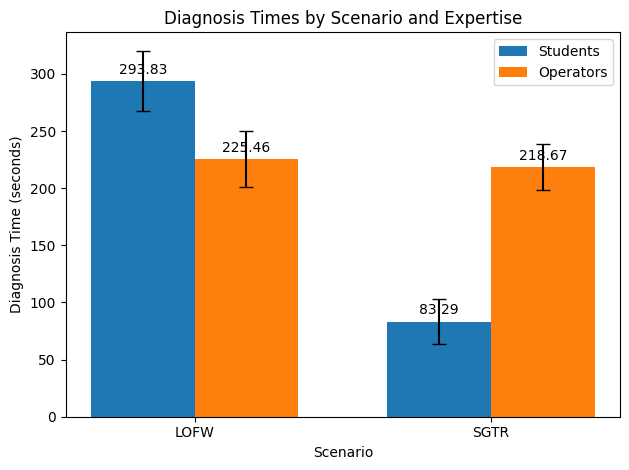

In [1]:
import matplotlib.pyplot as plt
import numpy as np

# Data
groups = ['LOFW', 'SGTR']
students_means = [293.83, 83.29]
operators_means = [225.46, 218.67]
students_se = [26.62, 19.64]
operators_se = [24.37, 20.38]

# Create an index for each tick position
x = np.arange(len(groups))

# Bar width
width = 0.35

fig, ax = plt.subplots()
rects1 = ax.bar(x - width/2, students_means, width, label='Students', yerr=students_se, capsize=5)
rects2 = ax.bar(x + width/2, operators_means, width, label='Operators', yerr=operators_se, capsize=5)

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_xlabel('Scenario')
ax.set_ylabel('Diagnosis Time (seconds)')
ax.set_title('Diagnosis Times by Scenario and Expertise')
ax.set_xticks(x)
ax.set_xticklabels(groups)
ax.legend()

# Function to attach a text label above each bar in *rects*, displaying its height.
def autolabel(rects):
    for rect in rects:
        height = rect.get_height()
        ax.annotate('{}'.format(height),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')

autolabel(rects1)
autolabel(rects2)

fig.tight_layout()

plt.show()
